In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numba

In [14]:
def identity_naive(n):
    identity = []
    for i in range(n):
        temp = [0] * n
        temp[i] = 1
        identity.append(temp)
    return identity

def identity_numpy(n):
    return np.eye(n)

@numba.jit(nopython=True)
def identity_numba(n):
    return np.eye(n)

identity_numba(1000)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [15]:
%timeit identity_naive(1000)
%timeit identity_numpy(1000)
%timeit identity_numba(1000)

3.96 ms ± 60.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
313 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
299 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Revisiting the 1D chain with a computer

In this exercise session, we will revisit the [exercises of week 3](https://moodle.polytechnique.fr/pluginfile.php/614753/course/section/57413/exercise_03.pdf) as a basic example of how we can use numerics in quantum physics.

We briefly recall the setting. We consider a Hilbert space spanned the orthonormal basis $\left\{ \ket n \right\}_{n \in \{ 1, \ldots, N-1\}}$. We define the right translation operator $\hat T$ by $\hat T \ket n = \ket{n+1}$ with periodic boundary conditions, meaning that $\hat T \ket {N-1} = \ket N = \ket 0$. We consider the Hamiltonian:

$$ \hat H = E_0 - J \sum_{n=0}^{N-1} \left( \ket{n} \bra{n+1} + \ket{n+1} \bra{n} \right) $$

where again, periodic boundary conditions imply that $\ket N = \ket 0$.

We recall that matrix multiplication is denoted with `@`. Multiplication with `*` is element-wise multiplication. 

You can easily obtain the documentation of a function by simply running `function_name?`.

#### Question 1
Construct the matrix representing $\hat T$ and $\hat H$. Check that they commute. *Hint: You can construct the identity matrix with `np.eye`. You can use the argument `k` to offset the position of the diagonal.*

In [3]:
# The number of sites
n_sites = 100

# The constant E_O
E_0 = 1

# The constant J
J = 2

# Define the translation operator
translation_operator = np.eye(n_sites, k=-1) + np.eye(n_sites, k=n_sites-1)

# Define the Hamiltonian
hamiltonian = E_0 * np.eye(n_sites) - J * (translation_operator + translation_operator.T)

print("T:\n", translation_operator)
print("\nH:\n", hamiltonian)

T:
 [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

H:
 [[ 1. -2.  0. ...  0.  0. -2.]
 [-2.  1. -2. ...  0.  0.  0.]
 [ 0. -2.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1. -2.  0.]
 [ 0.  0.  0. ... -2.  1. -2.]
 [-2.  0.  0. ...  0. -2.  1.]]


#### Question 2
Use `np.linalg.eig` to obtain the eigenvalues and eigenvectors of $\hat T$. The eigenvectors are automatically normalized.

In [4]:
# Calculate the eigenvalues and eigenvectors of the Translation operator
translation_eigenvalues, translation_eigenvectors = np.linalg.eig(translation_operator)

We can plot the eigenvalues in the complex plane to check that they are indeed the $N$th roots of the identity.

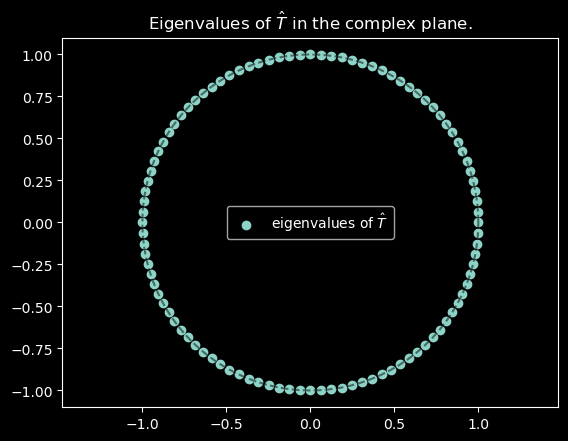

In [5]:
plt.scatter(np.real(translation_eigenvalues), np.imag(translation_eigenvalues), label=r'eigenvalues of $\hat T$')
plt.plot(np.real(np.exp(np.linspace(0, 2*np.pi, 100)*1.j)), np.imag(np.exp(np.linspace(0, 2*np.pi, 100)*1.j)), c='k', ls='--', alpha=0.5)
plt.legend()
plt.title(r"Eigenvalues of $\hat T$ in the complex plane.")
plt.axis('equal')
print()

#### Question 3
The generalized spectral theorem tells us that unitary operators like $\hat T$ can always be diagonalized in an orthonormal basis. Check analytically that if $\ket{\lambda_k}$ and $\ket{\lambda_{k'}}$ are eigenvectors for different eigenvalues of a unitary operator $\hat U$, then they are orthogonal.

#### Question 4
Check numerically that the eigenvectors of $\hat T$ are orthogonal. Are the eigenvectors perfectly orthogonal? Why?

In [6]:
# Check that the eigenvectors are orthogonal
for i in range(n_sites):
    for j in range(n_sites):
        if i != j:
            inner_product = np.vdot(translation_eigenvectors[:, i], translation_eigenvectors[:, j])
            if np.abs(inner_product) > 1e-9:
                print('Vectors {} and {} are not orthogonal!'.format(i, j))
                print(np.abs(inner_product))

#### Question 5
Obtain the Hamiltonian in the eigenbasis of $\hat T$. Compare the eigenvalues you obtained in this way with the eigenvalues obtained by directly diagonalizing $\hat H$. *Hint: You can use `np.diagonal`. For Hermitian matrices, you can use `np.linalg.eigh` instead of `np.linalg.eig`.*

In [7]:
# Eigenenergies through symmetry-adapted basis
hamiltonian_sym_basis = np.diag(translation_eigenvalues)
eigenenergies_1 = np.linalg.eigvalsh(hamiltonian_sym_basis)

# Eigenenergies through direct diagonalization 
eigenenergies_2 = np.linalg.eigvalsh(hamiltonian)

#### Question 6
Plot the eigenenergies of $\hat H$. Do you recover the same plot as in question 6 of the exercise sheet? Why?

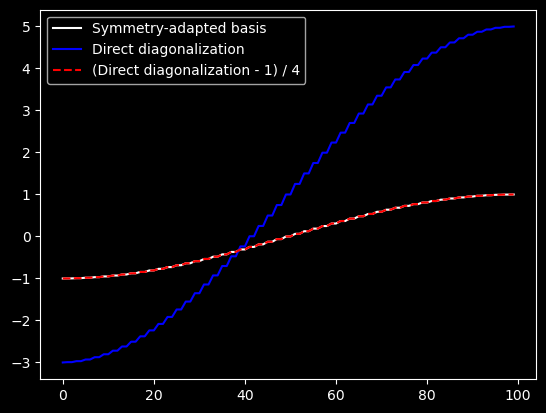

In [8]:
eigen = np.real(eigenenergies_2)
eigen = eigen - 1
eigen = eigen / 4

plt.plot(eigenenergies_1, color='white', label='Symmetry-adapted basis')
plt.plot(eigenenergies_2, color='blue', label='Direct diagonalization')
plt.plot(eigen, color='red', linestyle='--', label='(Direct diagonalization - 1) / 4')
plt.legend()
plt.show()

We can obtain the same plot using the following code:

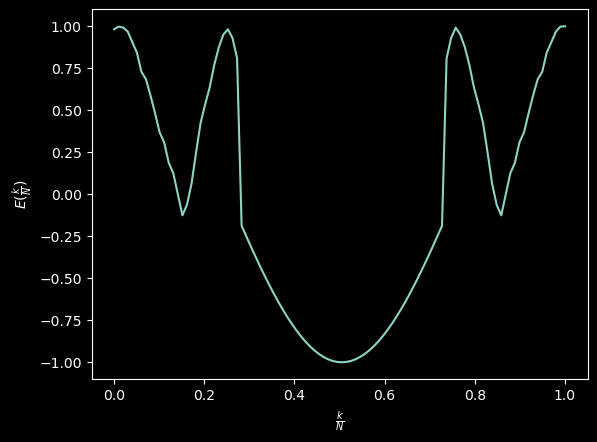

In [9]:
# Get the phase of the eigenvalues of T
standard_phase = np.imag(np.log(translation_eigenvalues))

# Put the phase in the interval [0, 2pi]
positive_phase = np.where(standard_phase<0, standard_phase+2*np.pi, standard_phase)

# Order the eigenvalues of H with the phase of the eigenvalues of T
ordering = np.argsort(positive_phase)
plt.plot(np.linspace(0, 1, n_sites), np.real(eigenenergies_1[ordering]))

plt.xlabel(r"$\frac{k}{N}$")
plt.ylabel(r"$E(\frac{k}{N})$")
print()

#### Question 7
Now consider the same Hamiltonian with open boundary conditions:

$$ \hat H = E_0 - J \sum_{n=0}^{N-2} \left( \ket{n} \bra{n+1} + \ket{n+1} \bra{n} \right) $$

In this Hamiltonian, there is no more hopping term between $\ket 0$ and $\ket{N-1}$. Construct the matrix for this Hamiltonian. Check numerically if it commutes with $\hat T$.

In [10]:
# Define the Hamiltonian
hamiltonian_obc = 

print("\nH:\n", hamiltonian_obc)

SyntaxError: invalid syntax (395909452.py, line 2)

#### Question 8
Can we apply the same procedure as in the exercise sheet to obtain the eigenenergies? Obtain the eigenenergies numerically and compare them to the eigenenergies in the periodic boundary condition case.

In [ ]:
eigenenergies_obc = # TODO

plt.plot(eigenenergies_obc)
plt.plot(eigenenergies_2)